In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
# np.random.multivariate_normal?

In [11]:
m1 = np.array([1,2])
cov1 = np.array([[2,0.2],[0.2,3]])
m2 = np.array([10,20])
cov2 = np.array([[5,2],[2,15]])

In [12]:
dist1 = np.random.multivariate_normal(m1,cov1,500)
dist2 = np.random.multivariate_normal(m2,cov2,500)

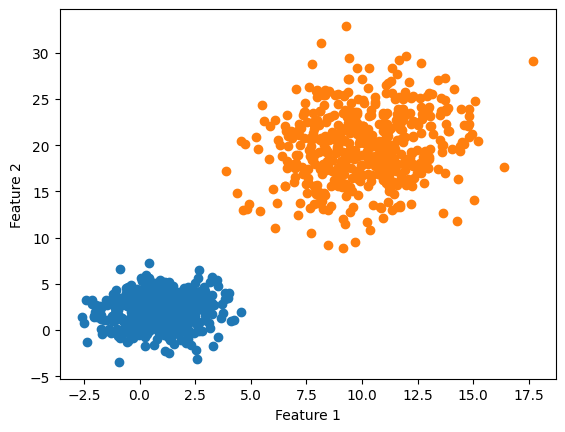

In [13]:
plt.scatter(dist1[:,0],dist1[:,1],label='Dist 1')
plt.scatter(dist2[:,0],dist2[:,1],label='Dist 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [18]:
X = np.vstack((dist1,dist2))
Y = np.hstack((np.zeros((500,)),np.ones((500,))))

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [23]:
xm = X_train.mean()
xstd = X_train.std()
X_train = (X_train-xm)/xstd
X_test = (X_test-xm)/xstd

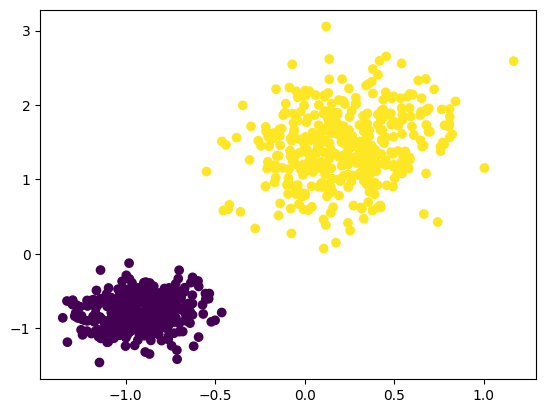

In [25]:
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.show()

In [33]:
def lrhp(X,theta):
    y_ = theta[0] + theta[1:]@X.T
    return y_
def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def hypothesis(X,theta):
    return sigmoid(lrhp(X,theta))
# lrhp(X,[1,1,1]).shape

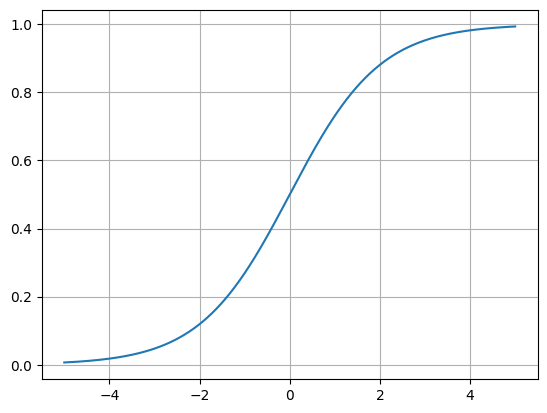

In [32]:
x = np.linspace(-5,5,1000)
y = sigmoid(x)
plt.plot(x,y)
plt.grid()
plt.show()

In [34]:
def cost(X,theta,Y):
    y_ = hypothesis(X,theta)
    err = -np.mean(Y*np.log(y_)+(1-Y)*np.log(1-y_))
    return err
cost(X,[0,0,0],Y)

0.6931471805599454

In [36]:
def gradient(X,theta,Y):
    N = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.zeros((theta.shape[0],))
    grad[0] = np.sum(Y - y_)
    grad[1:] = (Y - y_)@X
    return grad/N
gradient(X,np.array([0,0,0]),Y)

array([0.        , 2.28851496, 4.48919884])

In [37]:
def gradien_descent(X,Y,lr=0.001,epochs=1000):
    theta = np.zeros((X.shape[1]+1,))
    costs = []
    for e in range(epochs):
        costs.append(cost(X,theta,Y))
        grad = gradient(X,theta,Y)
        theta = theta + lr*grad
    return theta,costs

In [38]:
theta,costs = gradien_descent(X_train,Y_train,0.003,3000)
theta

array([-0.06572541,  0.96231575,  1.74052009])

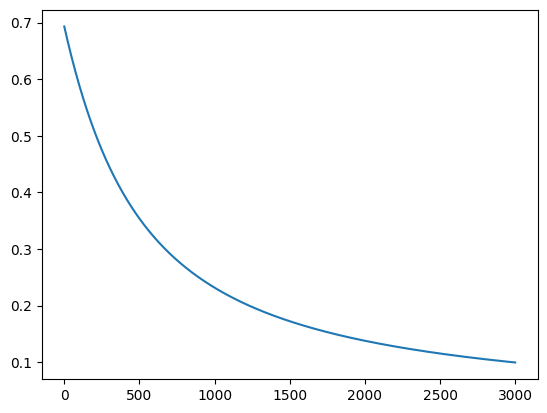

In [39]:
plt.plot(costs)